# Understanding Transformers 

The transformer model is based entirely on the __attention mechanism and completely gets rid of recurrence.__ 
The transformer uses a special type of attention mechanism called __self- attention.__
The transformer consists of an __encoder-decoder architecture__. We feed the input sentence (source sentence) to the encoder. The encoder learns the representation of the input sentence and sends the representation to the decoder. The decoder receives the representation learned by the encoder as input and generates the output sentence (target sentence).

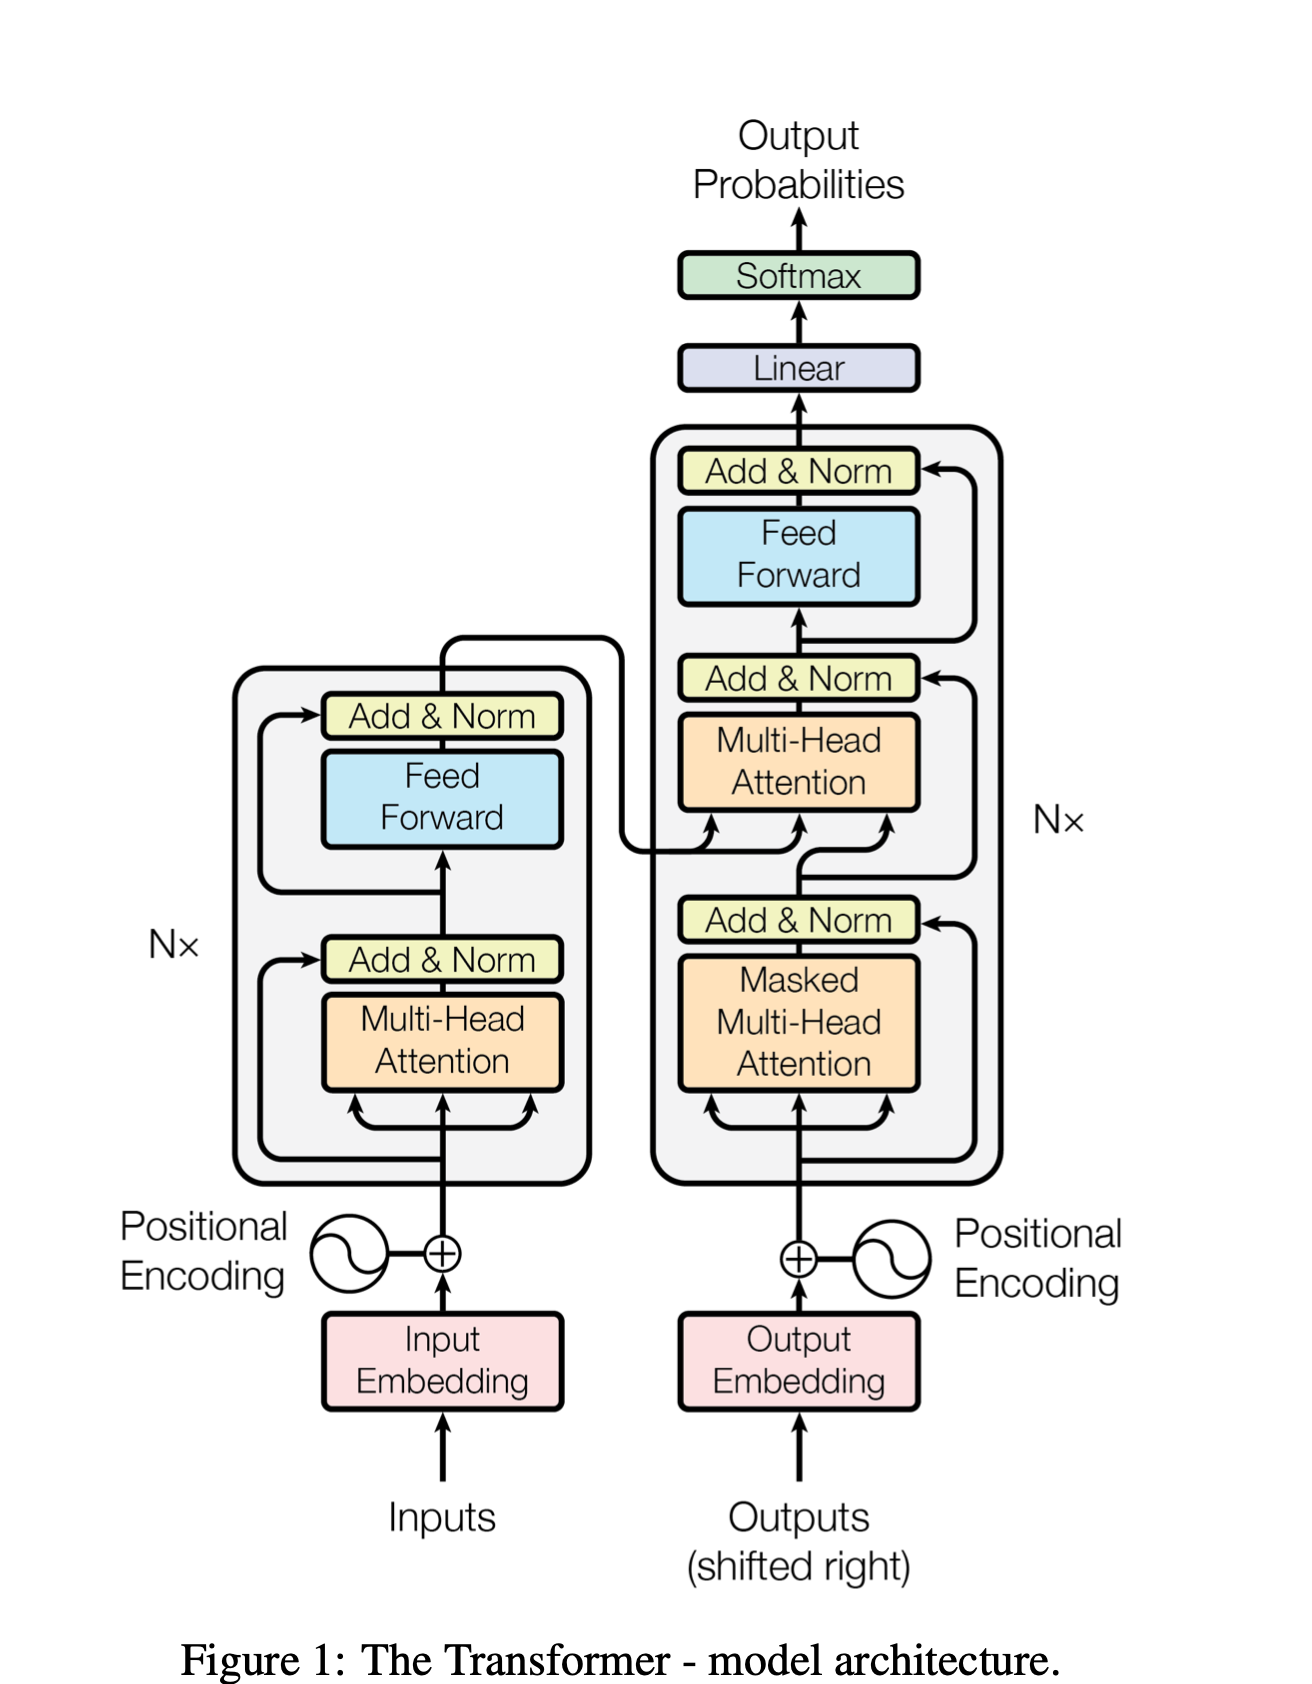

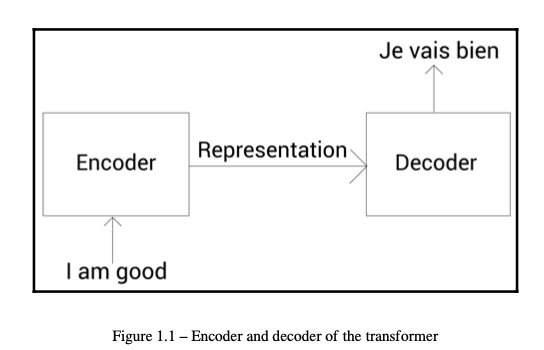

References : https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF#scrollTo=tNnx-Fx5DFDi

# Understanding Encoder

Transformer is consists of N stack of Encoders. Output of one encoder is input for second encoder and so on. The Final encoder output is representation. 
In __Attention is All you need__ paper, they used N=6.

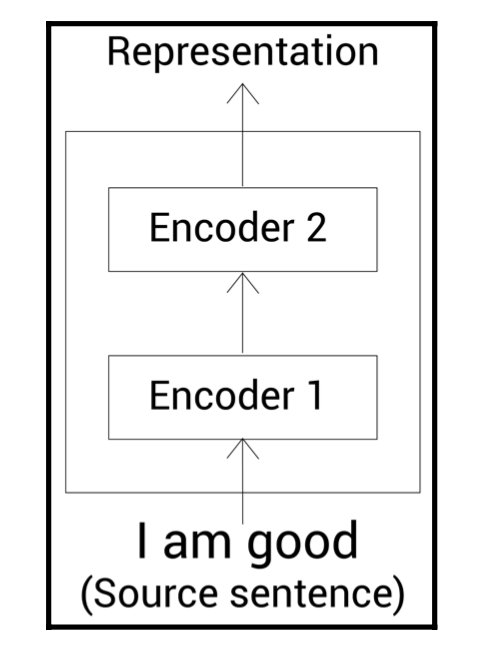

__So whats Inside the encoder?__
Single encoder is consist of Multi-head Attention and Feedforward network. 
Multi-Head attention is based on self attention mechanism. 

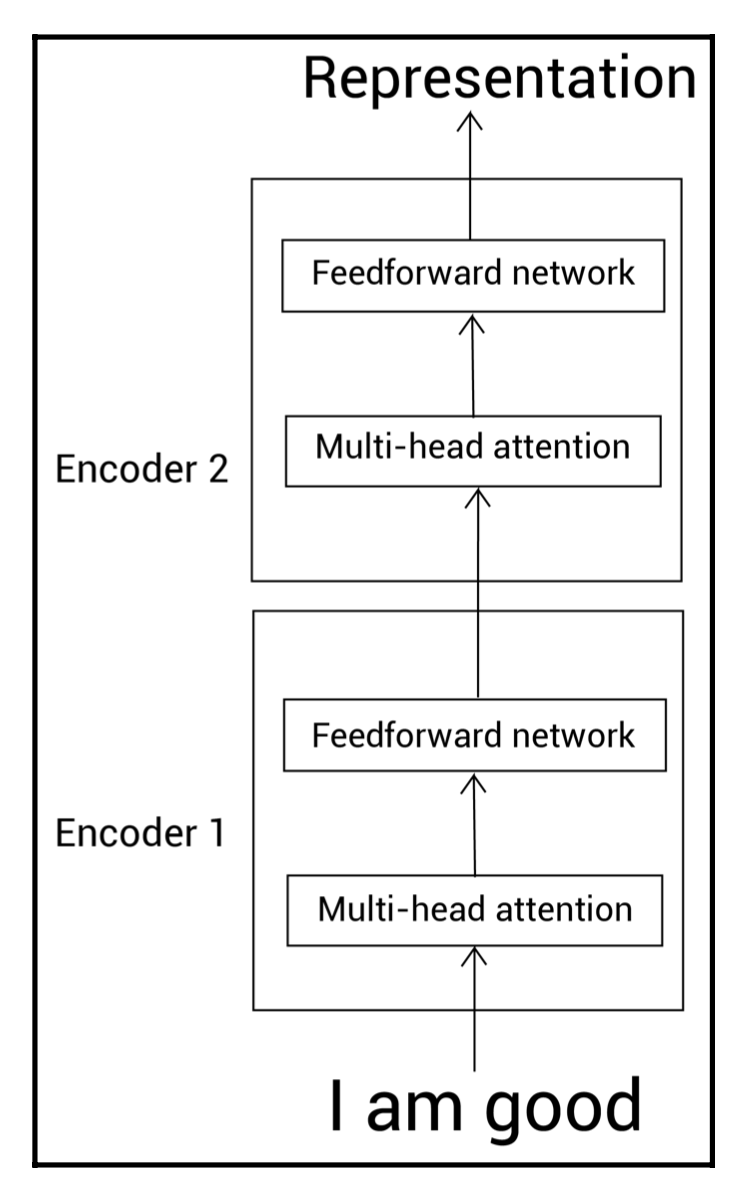


## Understanding Self-attention Mechanism

 _Also called as __Scaled dot product attention.___

In order to understand the self- attention mechanism, for below mentioned example:  
        _"A dog ate the food because it was hungry."_<br>
__Question:__ What does 'it' mean in the sentence 'dog' or 'food'?  
__Answer:__ Obviously, dog.  
__Question2:__ So how does machine findout that relation?  
__Answer:__ Using Self attention Mechanism.   

Basically, in self attention mechanism, model learns the representation of each word with respect to other words or relate with other words in order to get more information about the word.  
As shown in figure, while learning about the representation, it find outs that it relate to dog as compare to other words.


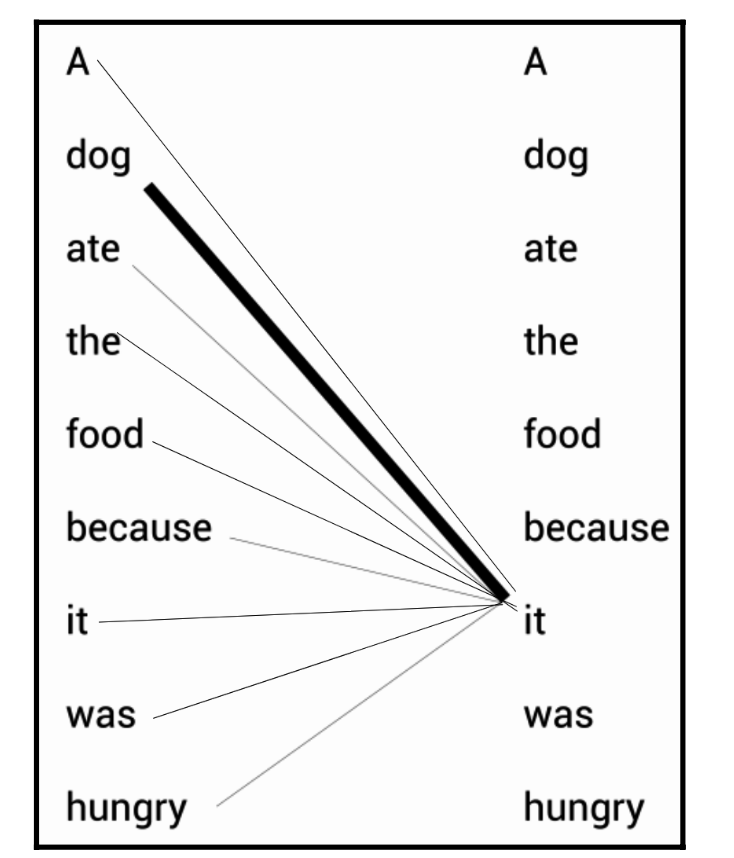

#### OUESTIONS: HOW DOES THIS WORKS?


In [568]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [444]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [474]:
sentence= 'I am good'
tokens=sentence.split(' ')
# vector=[]
# for tok in sentence.split(' '):
#     vector.append(list(wv[tok]))
# x=np.array(vector)
#vector representation of the sentence 
x =np.array( [
  [1, 0, 1, 0], # I
  [0, 2, 0, 2], # am
  [1, 1, 1, 1]])  # good
x.shape



(3, 4)

Now we will create three new matrices.  
__Query matrix Q  
Key Matrix K  
Value Matrix V__

To create these matrix, we create three new weights matrix $$W_q, W_k, W_v$$
and   
$$ Q= x.W_q $$
$$K=x.W_k$$ 
$$V= x.W_v$$
__Note:__ the weight matrices are randomly initialized and their optimal values will be learned during training. As we learn the optimal weights, we will obtain more accurate query, key, and value matrices.


In [475]:
#now randomly creating the weight matrix 
# W_q=np.random.randn(x.shape[1],64)
# W_k=np.random.randn(x.shape[1],64)
# W_v=np.random.randn(x.shape[1],64)

W_q=np.random.randint(2,size=(x.shape[1],x.shape[0]))
W_k=np.random.randint(2,size=(x.shape[1],x.shape[0]))
W_v=np.random.randint(4,size=(x.shape[1],x.shape[0]))
print('Query Weight:\n', W_q)
print('Key Weight:\n', W_k)
print('Value Weight:\n', W_v)

Query Weight:
 [[0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]]
Key Weight:
 [[1 1 0]
 [0 1 1]
 [1 1 1]
 [0 0 0]]
Value Weight:
 [[2 2 0]
 [0 1 3]
 [0 2 1]
 [3 0 1]]


In [476]:
#Creating the Query, Key, and Value Matrix
Q= np.dot(x,W_q)
K=np.dot(x,W_k)
V= np.dot(x,W_v)
print('Query:\n', Q)
print('Key:\n', K)
print('Value:\n', V)

Query:
 [[1 2 0]
 [4 2 0]
 [3 3 0]]
Key:
 [[2 2 1]
 [0 2 2]
 [2 3 2]]
Value:
 [[2 4 1]
 [6 2 8]
 [5 5 5]]


### Step 1
Computing Dot product between Query Q, and K 

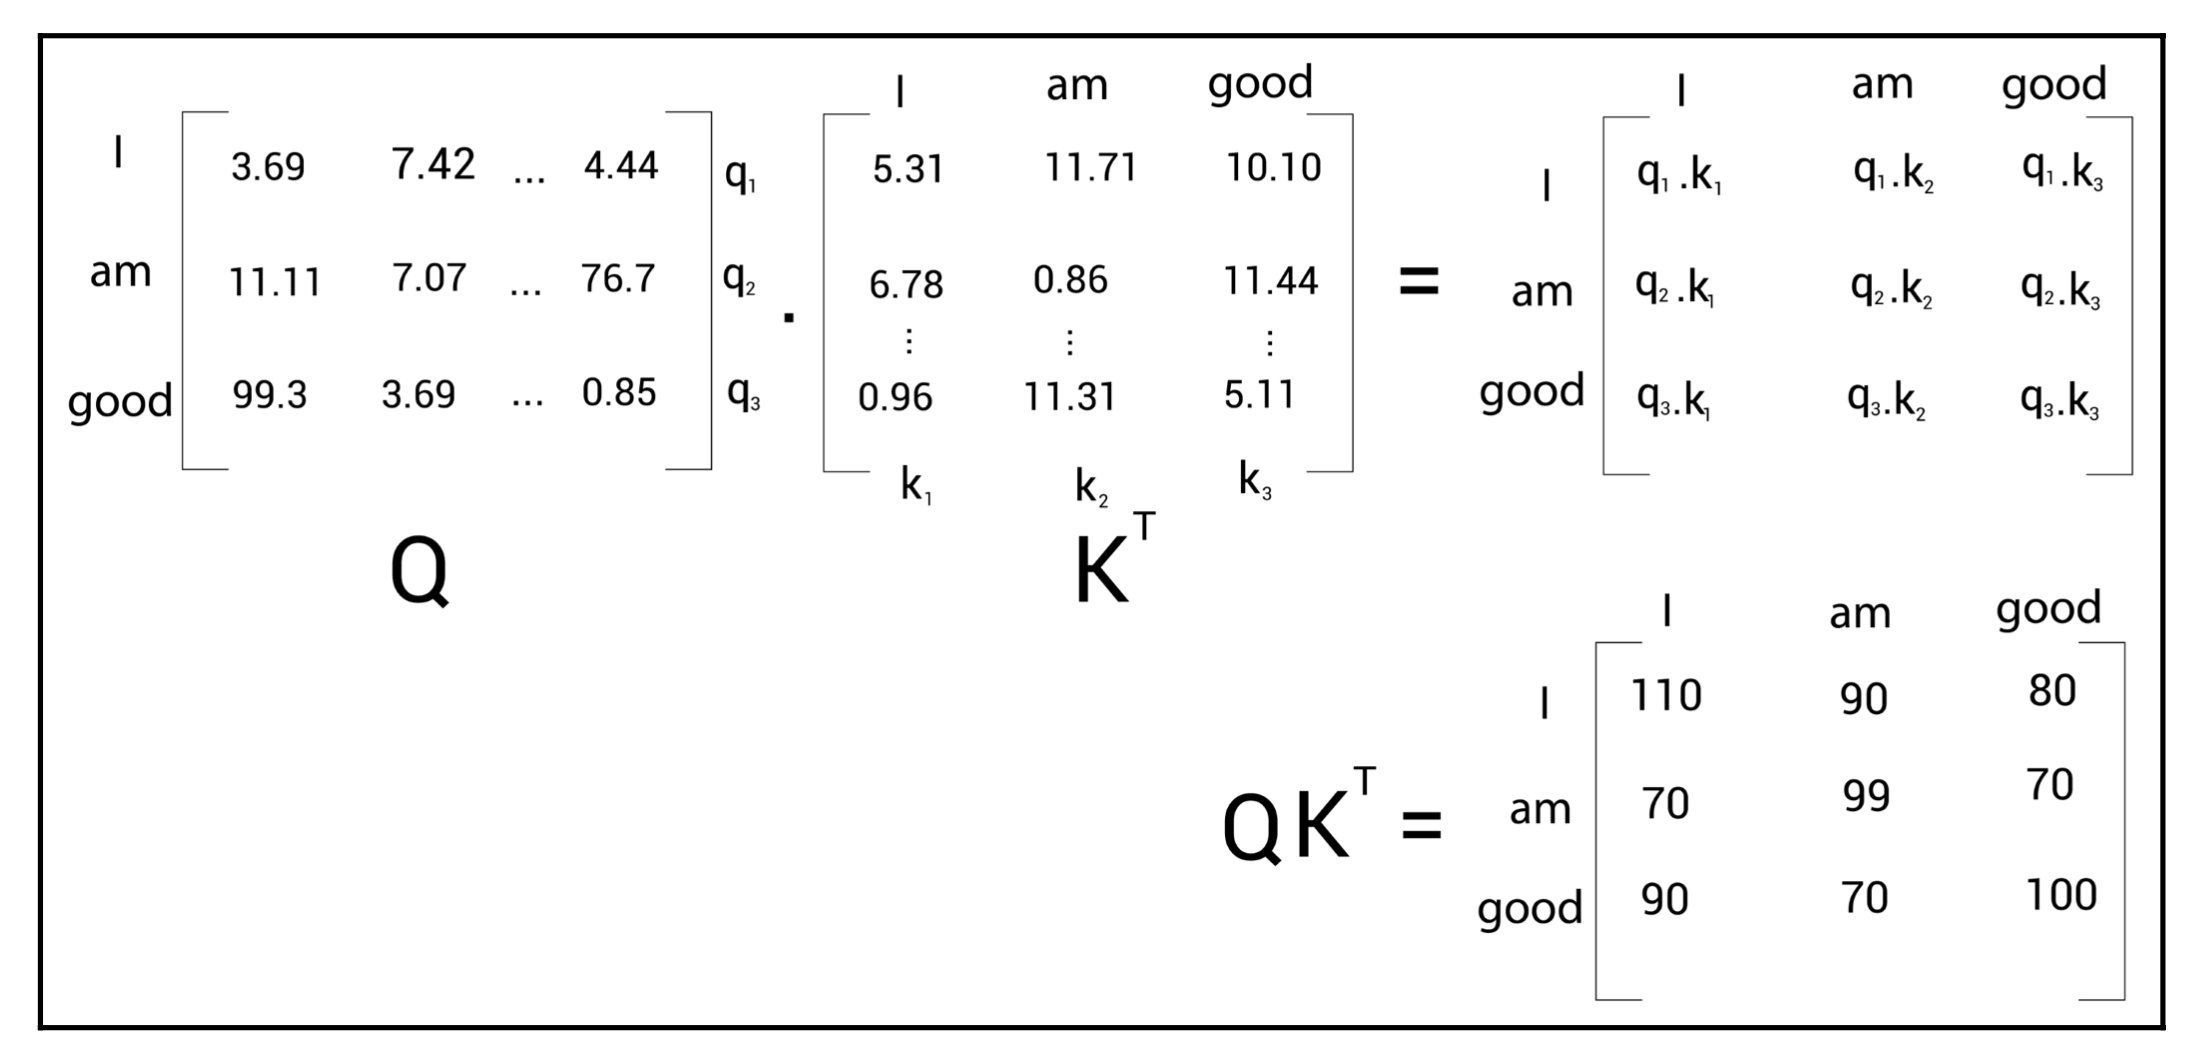

__Computing the dot product between two vectors tells us how similar they are, we can also call this similarity score.__


In [477]:
# QK= np.dot(Q,K.transpose())
QK=Q@K.transpose()
QK

array([[ 6,  4,  8],
       [12,  4, 14],
       [12,  6, 15]])

In [478]:
#lets visualize it proper in dataframe
df_qk= pd.DataFrame(QK,columns=tokens,index=tokens)
df_qk

I  am  good
I      6   4     8
am    12   4    14
good  12   6    15

### Step 2
The next step in the self-attention mechanism is to __divide the matrix by the square root of the dimension of the key vector__.  
__This is useful in obtaining stable gradients.__
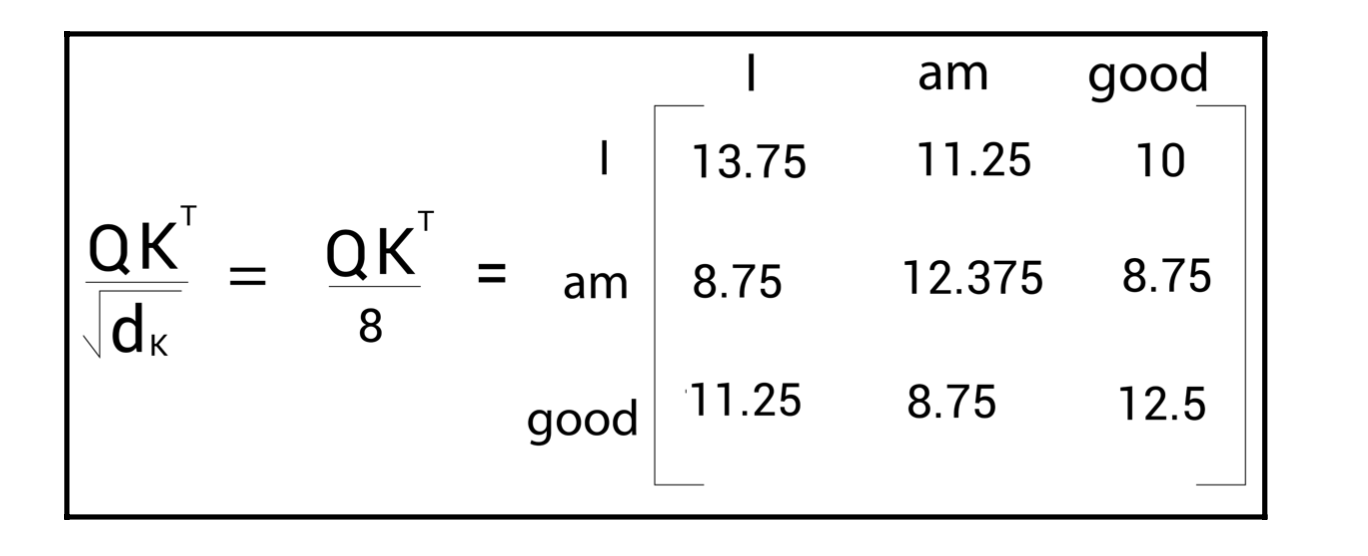


In [479]:
QK_d=np.round(np.divide(QK,np.sqrt(K.shape[1])),2)
QK_d

array([[3.46, 2.31, 4.62],
       [6.93, 2.31, 8.08],
       [6.93, 3.46, 8.66]])

In [480]:
#again visualize this in dataframe 
df_QK_d= pd.DataFrame(QK_d,columns=tokens,index=tokens)
df_QK_d

I    am  good
I     3.46  2.31  4.62
am    6.93  2.31  8.08
good  6.93  3.46  8.66

### Step 3
Now normalizing the similarity score, using softmax function. Which helps in bringing the score to range of 0 to 1 and sum of score will be 1.Also, called __Attention Score__.
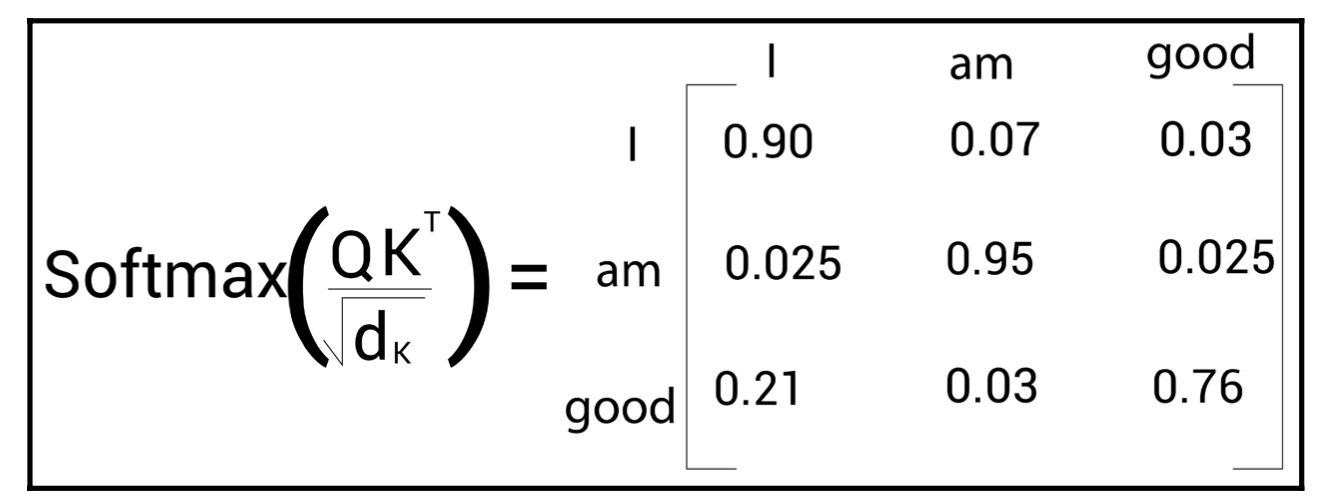


In [481]:
from sklearn.utils.extmath import softmax

soft_QK_d= softmax(QK_d)
print("Softmax result:\n",np.round(soft_QK_d,3))

Softmax result:
 [[0.222 0.07  0.708]
 [0.24  0.002 0.758]
 [0.15  0.005 0.845]]


In [482]:
#Checking row sum is 1 or not 
np.sum(soft_QK_d[0]),soft_QK_d[0]

(1.0, array([0.22189825, 0.07026114, 0.70784061]))

In [483]:
#again visualize this in dataframe 
df_soft_QK_d= pd.DataFrame(np.round(soft_QK_d*100,2),columns=tokens,index=tokens,dtype=float)
df_soft_QK_d

I    am   good
I     22.19  7.03  70.78
am    23.99  0.24  75.77
good  14.99  0.47  84.55

### Step 4
Now, the final step in the self-attention mechanism is to compute the attention matrix,z. Z is called as Attention Matrix.

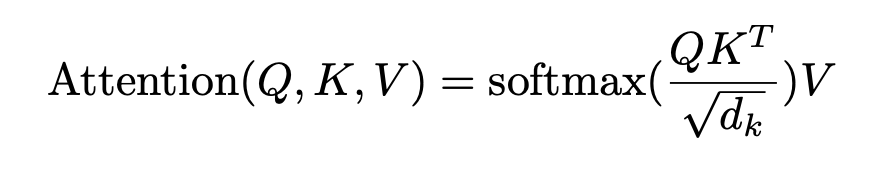


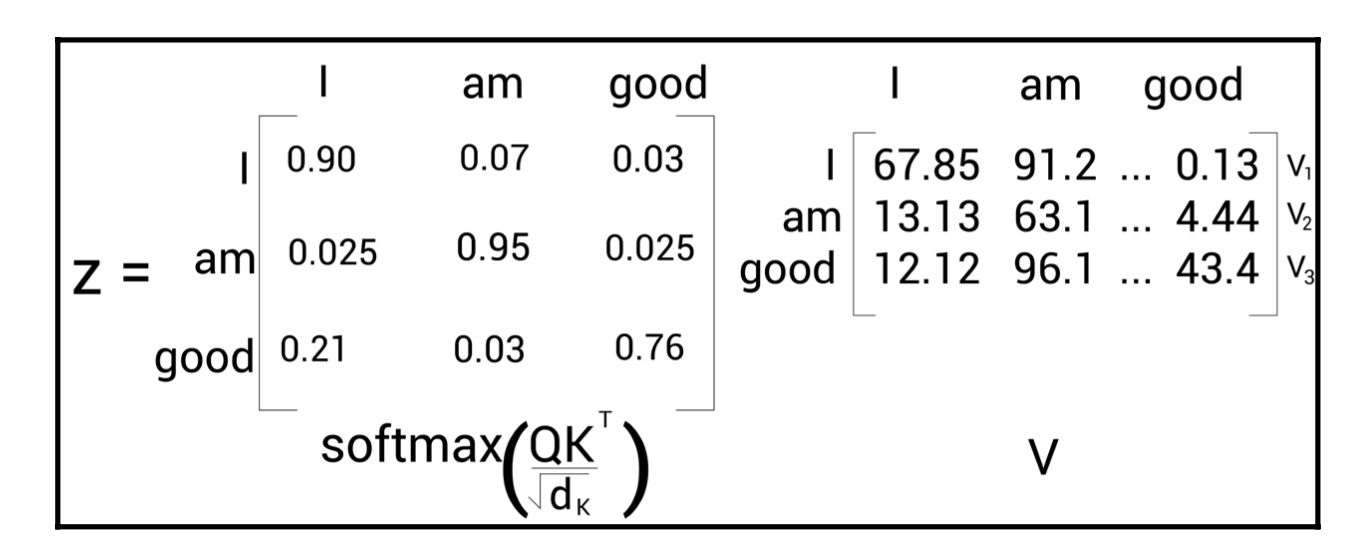



In [484]:
z= V[:,None] * soft_QK_d.T[:,:,None]
print('Self Attention:\n',np.round(z,2))

Self Attention:
 [[[0.44 0.89 0.22]
  [0.48 0.96 0.24]
  [0.3  0.6  0.15]]

 [[0.42 0.14 0.56]
  [0.01 0.   0.02]
  [0.03 0.01 0.04]]

 [[3.54 3.54 3.54]
  [3.79 3.79 3.79]
  [4.23 4.23 4.23]]]


In [485]:
np.round(z.sum(axis=0),2)

array([[4.4 , 4.57, 4.32],
       [4.28, 4.75, 4.05],
       [4.56, 4.84, 4.41]])

In [486]:
df_z= pd.DataFrame(np.round(np.sum(z,axis=0),2),index=tokens, columns=tokens,dtype=float)
df_z

I    am  good
I     4.40  4.57  4.32
am    4.28  4.75  4.05
good  4.56  4.84  4.41

### Putting it all together 

Self attention mechanism is looks like this:

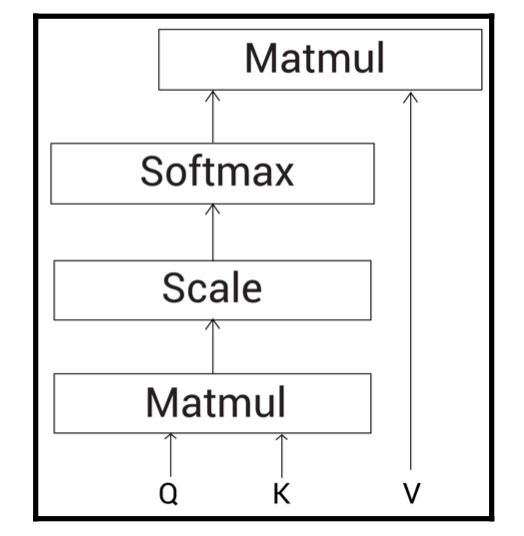

In [487]:
def self_attention(x):
    '''
    Self attention mechanism to understand the basic working of self attention mechanism
    As per my understanding, Self attention mechanism is trying to find the similarity score 
    between words and then using softmax converting into probabilities.
    '''
    # creating random weigth matrix
#     W_q=np.random.randn(x.shape[1],64)
#     W_k=np.random.randn(x.shape[1],64)
#     W_v=np.random.randn(x.shape[1],64)
    W_q=np.random.randint(2,size=(x.shape[1],x.shape[0]))
    W_k=np.random.randint(2,size=(x.shape[1],x.shape[0]))
    W_v=np.random.randint(2,size=(x.shape[1],x.shape[0]))

    
    #Creating the Query, Key, and Value Matrix
    Q= np.dot(x,W_q) # trainable 
    K=np.dot(x,W_k) # trainable 
    V= np.dot(x,W_v) # trainable 
    
    # QK= np.dot(Q,K.transpose())
    #step 1
    #QK=Q@K.transpose()
    QK= np.dot(Q,K.transpose())
    
    #step 2 
    QK_d=np.divide(QK,np.sqrt(K.shape[1]))
    
    #step 3
    soft_QK_d= softmax(QK_d)
    
    #step 4
    attention_matrix= V[:,None] * soft_QK_d.T[:,:,None]
    
    return attention_matrix.sum(axis=0)

In [488]:
np.round(self_attention(x),2)

array([[2.09, 0.18, 0.18],
       [2.09, 0.18, 0.18],
       [2.03, 0.06, 0.06]])

# Multihead Attention
- Instead of single attention we use multihead attention, in order to enhance the accuracy in the calculation. 

__non ambiguous example__  
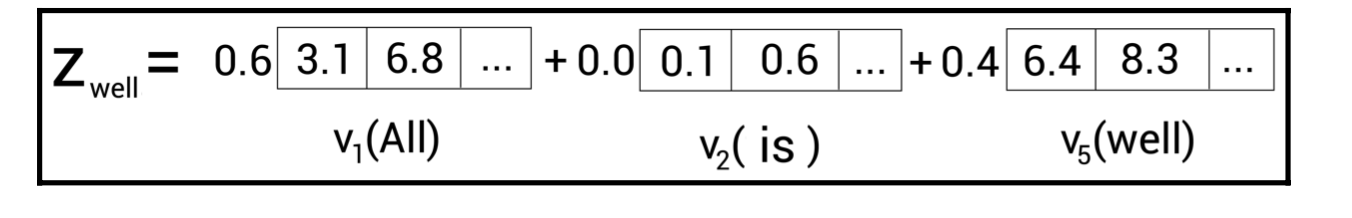  
 __ambiguous example__ 
 
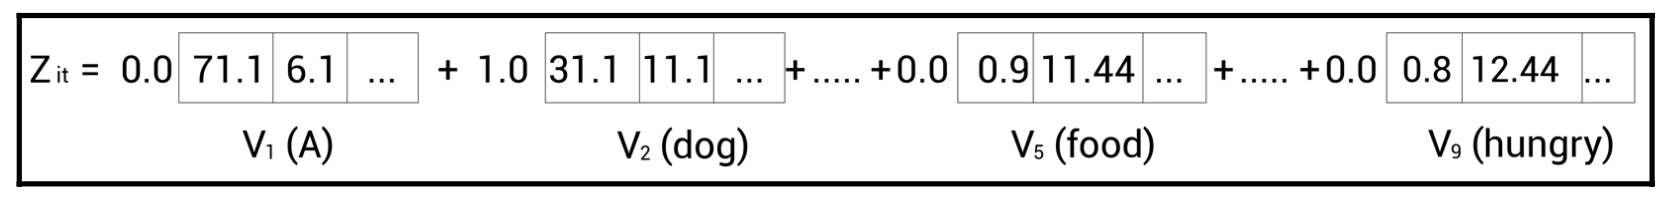  

Thus, if the value vector of other words dominates the actual word in cases as shown in the preceding example, where the actual word is ambiguous, then this dominance is useful; otherwise, it will cause an issue in understanding the right meaning of the word. So, in order to make sure that our results are accurate, instead of computing a single attention matrix, we will compute multiple attention matrices and then concatenate their results. The idea behind using multi-head attention is that instead of using a single attention head, if we use multiple attention heads, then our attention matrix will be more accurate.

\begin{equation}
\text{Multi-Head Attention} = Concatenate(z_1,z_2,...z_n)W^0
\end{equation}



In [489]:
# calculating three multihead attention 

z1= self_attention(x)
z2= self_attention(x)
z3= self_attention(x)

print("Attention head1:\n",np.round(z1,2))
print("Attention head2:\n",np.round(z2,2))
print("Attention head3:\n",np.round(z3,2))
z1.shape,z2.shape,z3.shape

Attention head1:
 [[2.81 0.81 2.  ]
 [2.85 0.97 1.88]
 [2.88 0.95 1.92]]
Attention head2:
 [[0.   2.43 1.57]
 [0.   2.5  1.5 ]
 [0.   2.5  1.5 ]]
Attention head3:
 [[0.61 0.61 0.61]
 [0.03 0.03 0.03]
 [0.15 0.15 0.15]]


((3, 3), (3, 3), (3, 3))

In [490]:
multi_head_attention= np.hstack((z1,z2,z3))

print('Multi-Head Attention:\n',np.round(multi_head_attention,2))

Multi-Head Attention:
 [[2.81 0.81 2.   0.   2.43 1.57 0.61 0.61 0.61]
 [2.85 0.97 1.88 0.   2.5  1.5  0.03 0.03 0.03]
 [2.88 0.95 1.92 0.   2.5  1.5  0.15 0.15 0.15]]


In [491]:
#putting it all together 
def multiheadattention(x,num_of_head=8):
    Z=[]
   
    for i in range(num_of_head):
        if i==0:
            Z= self_attention(x)
        else:
            Z=np.hstack((Z,self_attention(x)))
    #creating random weight matrix
    w_0= np.random.randn(Z.shape[1],Z.shape[1]) # training =True
    Z= np.dot(Z,w_0)
    return Z
    

In [492]:
multi_head_attention=multiheadattention(x,8)
multi_head_attention.shape

(3, 24)

In [493]:
#visualizing in dataframe 
df_z= pd.DataFrame(np.round(np.sum(z,axis=1),2),index=tokens,dtype=float)
df_z

0      1      2
I      1.22   2.45   0.61
am     0.46   0.15   0.62
good  11.56  11.56  11.56

__Overall__

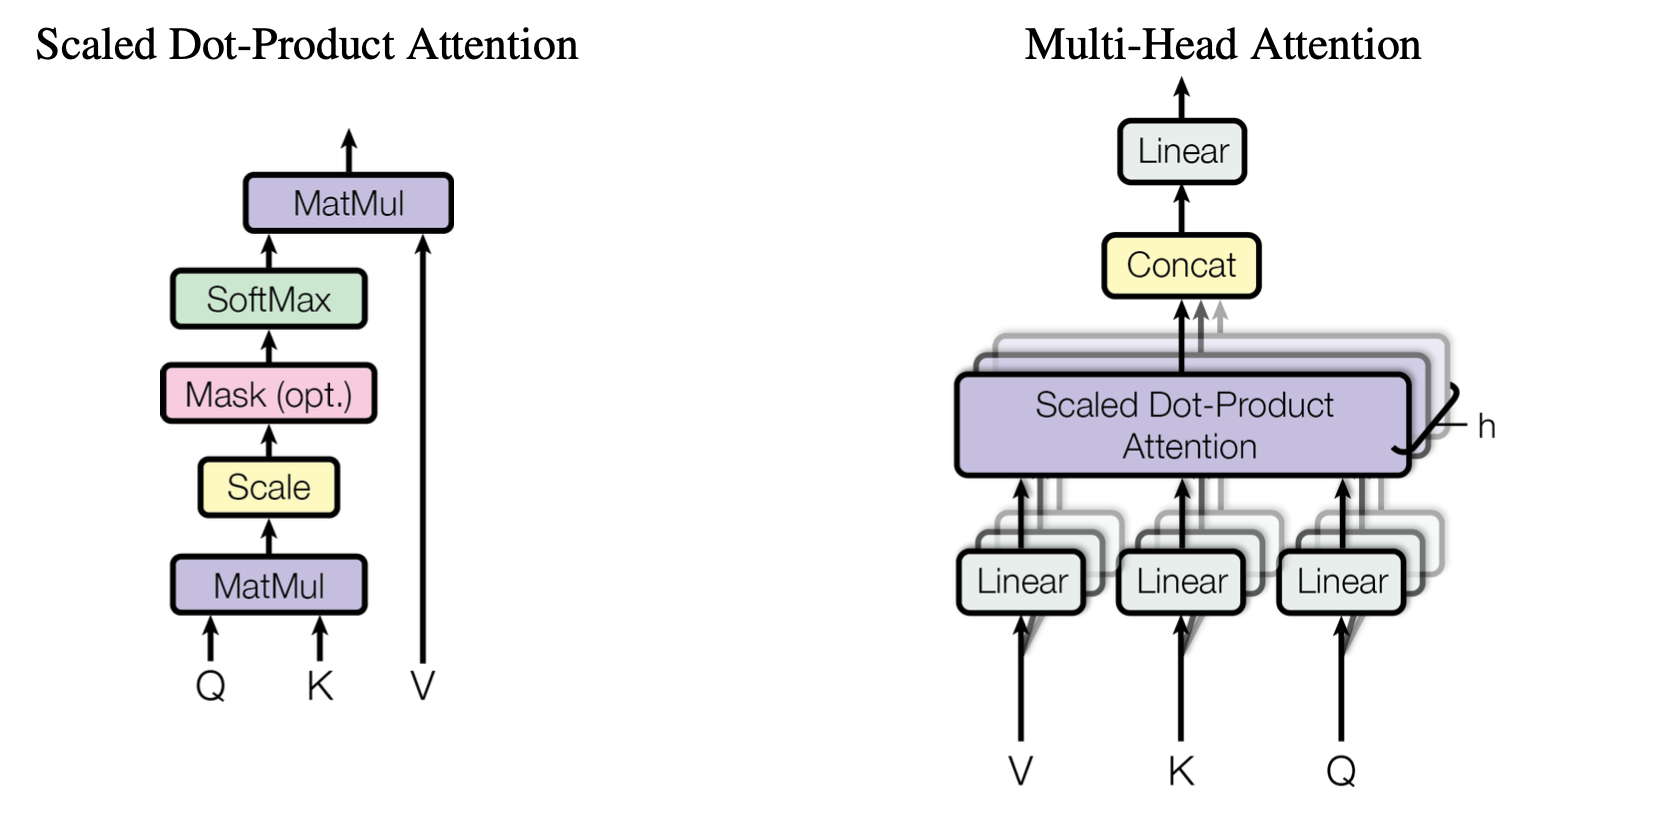  


## Understanding Positional Encoding

- In sequential model, we feed sentence to network word by word and so on, So, network understand the sentence and no positional encoding is required. 
- But, in transformer model we feed all the words parallely hence understanding the sentence was a problem. 
- Hence, positional encoding is required in order to understand the word order. 

__How to achieve that ?__
- To do this, we introduce a technique called positional encoding. Positional encoding, as the name suggests, is an encoding indicating the position of the word in a sentence (word order).

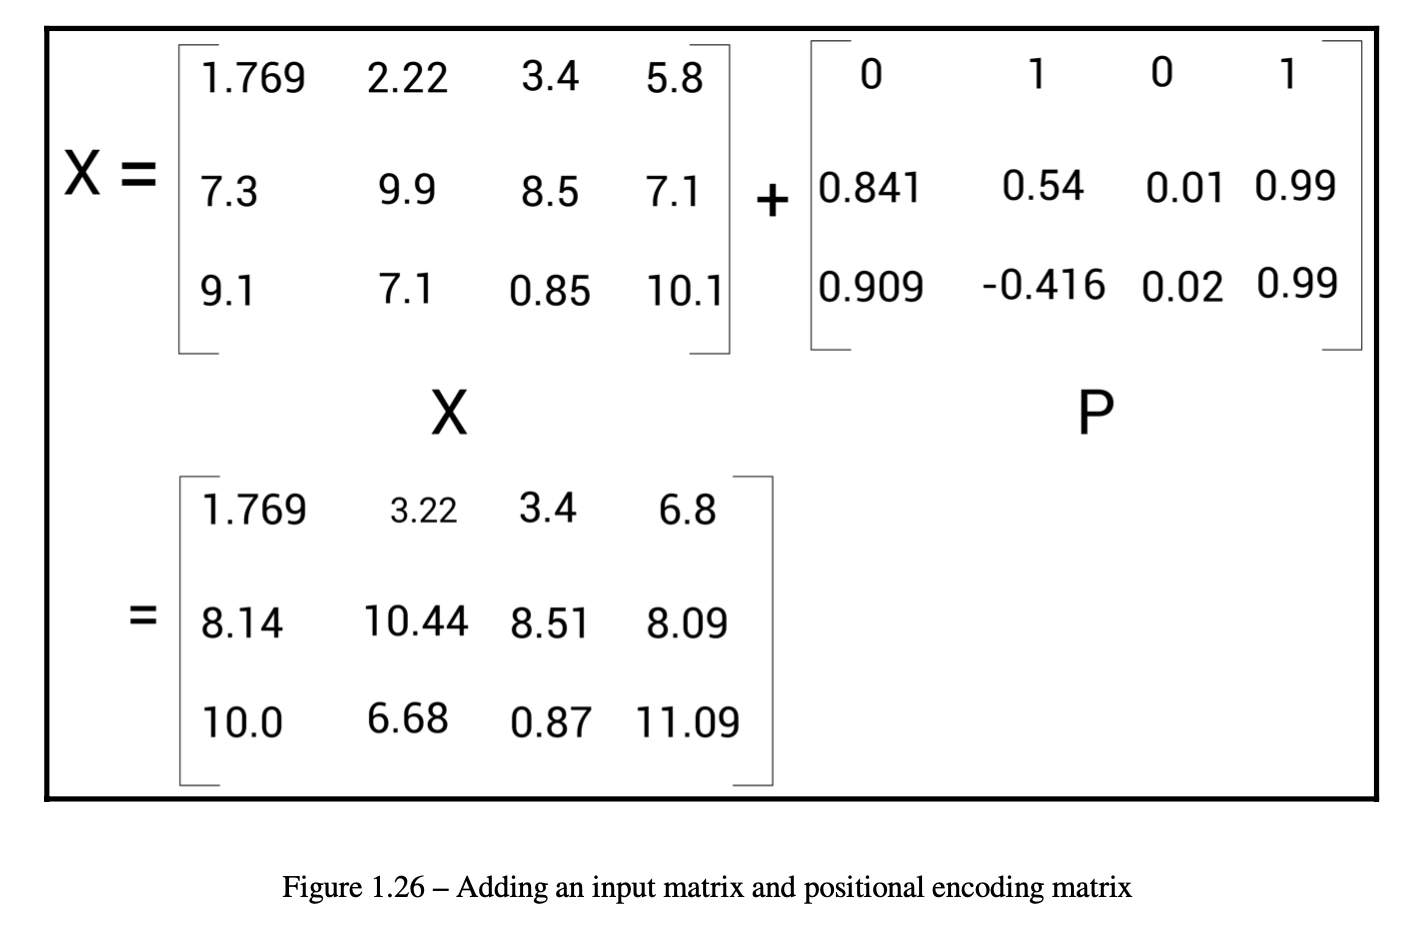  

__The authors of the transformer paper Attention Is All You Need have used the sinusoidal function for computing the positional encoding, as shown:__
 
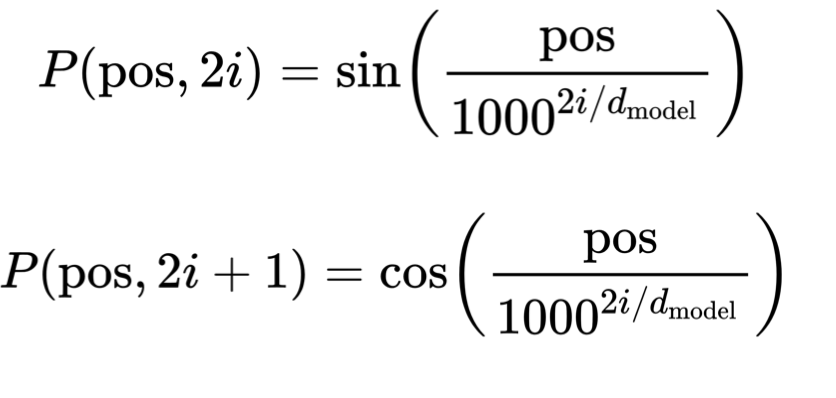  
\begin{equation}
 \text{pos} = \text{position of the word in the sentence. }
 \text{i} = \text{position of the embedding. }
 d_{model} = \text{dimension of the embedding matrix. In this case 4. }
\end{equation}

__Example__

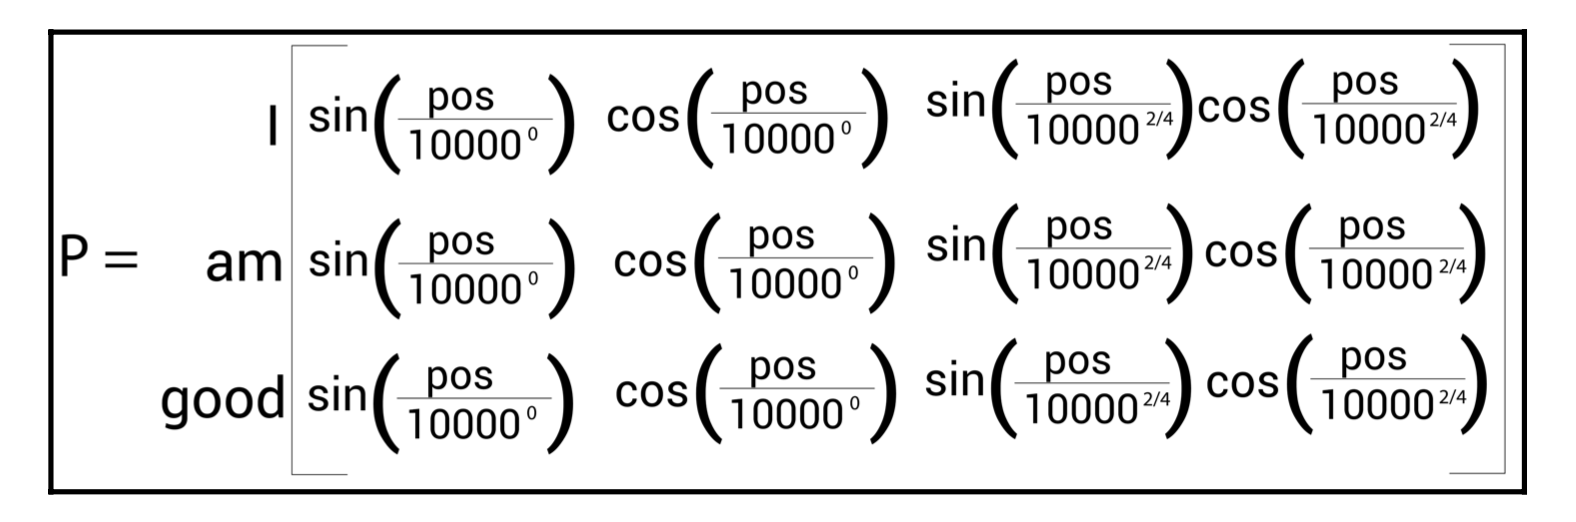 


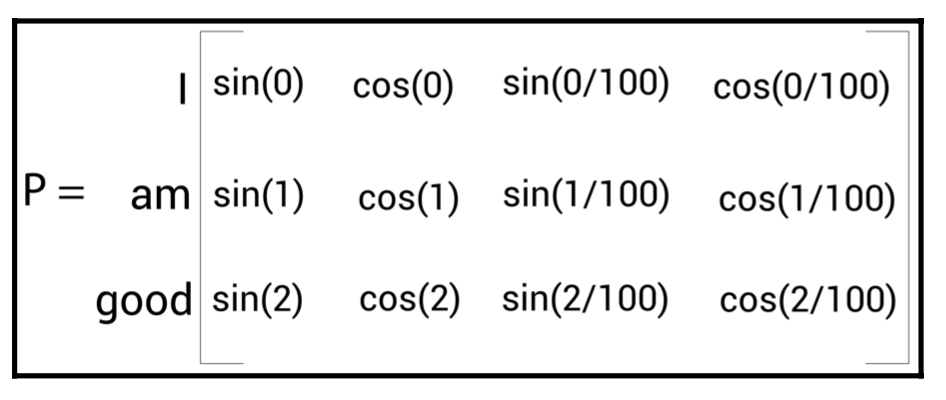 

 


In [495]:
# performing position encoding 

#creating random positional embedding
p=np.zeros(x.shape)
d_model= x.shape[1]

for i in range(x.shape[0]):
    for j in range(0,d_model,2):
        p[i][j]= np.sin(i/(1000**((2*j)/d_model)))
        p[i][j+1]= np.cos(i/(1000**((2*j)/d_model)))

print('Shape:',p.shape)
np.round(p,2)

Shape: (3, 4)


array([[ 0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.84,  0.54,  0.  ,  1.  ],
       [ 0.91, -0.42,  0.  ,  1.  ]])

In [496]:
#creating function 
def positional_encoding(x):
    p=np.zeros(x.shape)
    d_model= x.shape[1]
    for i in range(x.shape[0]):
        for j in range(0,d_model,2):
            p[i][j]= np.sin(i/(1000**((2*j)/d_model)))
            p[i][j+1]= np.cos(i/(1000**((2*j)/d_model)))
    sns.set(rc={'figure.figsize':(30,6)})
    ax = sns.heatmap(p.T)
    ax.invert_yaxis()
    ax.set_ylabel("input dimension")
    ax.set_xlabel("time step")
    ax.set_title("Sinusoid absolute positional encoding")
    
    x=x+p
    return x


(3, 4)

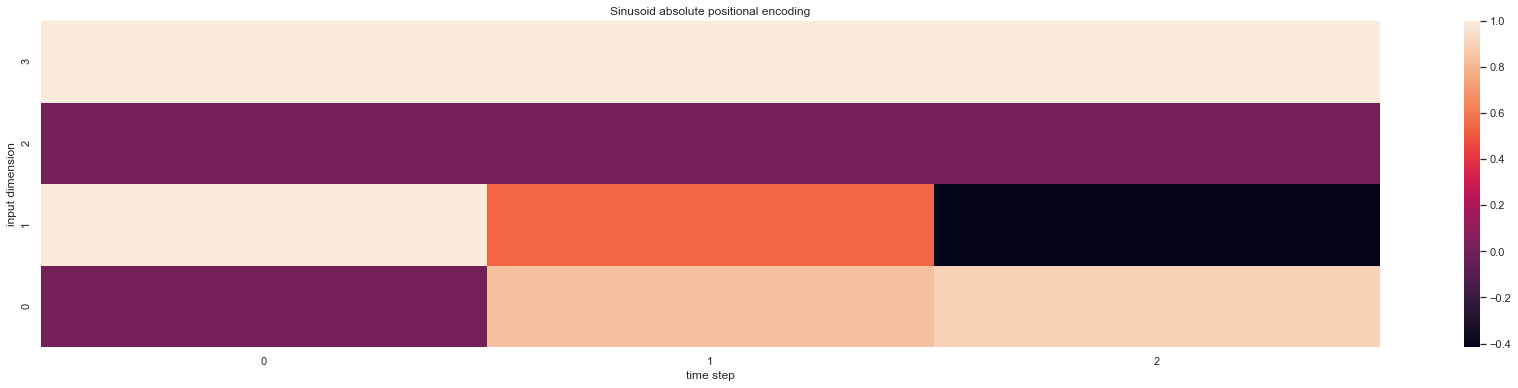

In [497]:
x_aft_pe=positional_encoding(x)
x_aft_pe.shape

#### How position encoding work ?

In [498]:
from sklearn.metrics.pairwise import cosine_similarity

print("Positional Encoding")
print(cosine_similarity(p[0].reshape(1,-1),p[1].reshape(1,-1)))
print(cosine_similarity(p[0].reshape(1,-1),p[2].reshape(1,-1)))
# print(cosine_similarity(p[0].reshape(1,-1),p[5].reshape(1,-1)))
# print(cosine_similarity(p[0].reshape(1,-1),p[8].reshape(1,-1)))


# after adding in the embedding matrix
print("Embedding with positional Encoding")
print(cosine_similarity(x_aft_pe[0].reshape(1,-1),x_aft_pe[1].reshape(1,-1)))
print(cosine_similarity(x_aft_pe[0].reshape(1,-1),x_aft_pe[2].reshape(1,-1)))
print(cosine_similarity(x_aft_pe[1].reshape(1,-1),x_aft_pe[2].reshape(1,-1)))
# print(cosine_similarity(x_aft_pe[1].reshape(1,-1),x_aft_pe[8].reshape(1,-1)))

Positional Encoding
[[0.7701509]]
[[0.29192558]]
Embedding with positional Encoding
[[0.79385739]]
[[0.91635219]]
[[0.75418359]]


__As we can see , farther the word have lower cosine similarity. Thats the essence of the position encoding to ensure the word position.__

In [499]:
# Putting it all together
def positional_encoding(x):
    p=np.zeros(x.shape)
    d_model= x.shape[1]
    for i in range(x.shape[0]):
        for j in range(0,d_model,2):
            p[i][j]= np.sin(i/(1000**((2*j)/d_model)))
            p[i][j+1]= np.cos(i/(1000**((2*j)/d_model)))
    x=x+p
    return x

def multiheadattention(x,num_of_head=8):
    Z=[]
    for i in range(num_of_head):
        if i==0:
            Z= self_attention(x)
        else:
            Z=np.hstack((Z,self_attention(x)))
    #creating random weight matrix
    w_0= np.random.randn(Z.shape[1],x.shape[1]) # training =True
    Z= np.dot(Z,w_0)
    return Z



In [501]:
x_after_pe= positional_encoding(x)
multi_head_attention= multiheadattention(x_after_pe,8)
# checking positional encoding looses the positional information 
print("Embedding with positional Encoding")
print(cosine_similarity(multi_head_attention[0].reshape(1,-1),multi_head_attention[1].reshape(1,-1)))
print(cosine_similarity(multi_head_attention[0].reshape(1,-1),multi_head_attention[2].reshape(1,-1)))
# print(cosine_similarity(multi_head_attention[0].reshape(1,-1),multi_head_attention[5].reshape(1,-1)))
# print(cosine_similarity(multi_head_attention[0].reshape(1,-1),multi_head_attention[8].reshape(1,-1)))

print('As we see the positional encoding information are lost.')

Embedding with positional Encoding
[[0.99005067]]
[[0.99795913]]
As we see the positional encoding information are lost.


### Understanding Add and norm components
- Basically a residual connection followed by layer normalization. __Layer normalization promotes faster training by preventing the values in each layer from changing heavily.__
-The Post-LN contains an add function and a layer normalization process. The add function processes the residual connections that come from the input of the sub-layer. The goal of the residual connections is to make sure critical information is not lost. The Post-LN or layer normalization can thus be described as follows:
$$LayerNorm(x+Sublayer(x))$$




In [502]:
#code
import tensorflow as tf 
layernorm= tf.keras.layers.LayerNormalization(axis=1)
multi_head_atten_layer=np.array(layernorm((multi_head_attention+x_aft_pe)))
multi_head_atten_layer

array([[-1.1565657 ,  1.0133004 ,  0.9730469 , -0.82978165],
       [-1.4961393 ,  1.171509  ,  0.5723585 , -0.2477281 ],
       [-1.2331741 ,  0.8448816 ,  1.1133026 , -0.7250101 ]],
      dtype=float32)

In [503]:
#overall 
x_after_pe=positional_encoding(x)

multi_head_attention= multiheadattention(x_after_pe,8)

layernorm= tf.keras.layers.LayerNormalization(axis=1)

multi_head_atten_layer=np.array(layernorm((multi_head_attention+x_after_pe)))

In [504]:
multi_head_atten_layer.shape

(3, 4)

In [506]:
# checking positional encoding looses the positional information 
print("Embedding with positional Encoding")
print(cosine_similarity(multi_head_atten_layer[0].reshape(1,-1),multi_head_atten_layer[1].reshape(1,-1)))
print(cosine_similarity(multi_head_atten_layer[0].reshape(1,-1),multi_head_atten_layer[2].reshape(1,-1)))
# print(cosine_similarity(multi_head_atten_layer[0].reshape(1,-1),multi_head_atten_layer[5].reshape(1,-1)))
# print(cosine_similarity(multi_head_atten_layer[0].reshape(1,-1),multi_head_atten_layer[8].reshape(1,-1)))
print('As we see the positional encoding information are some what is lost. But, i guess it will be gained while training')

Embedding with positional Encoding
[[0.99897134]]
[[0.9994551]]
As we see the positional encoding information are some what is lost. But, i guess it will be gained while training


## Putting it all together

In [509]:
def encoder(x,num_of_heads=8):
    '''
    Basic encoder function to understand the encoder architecture
    '''
    # positional encoding
    x_after_pe=positional_encoding(x)
    # multihead attention 
    multi_head_attention= multiheadattention(x_after_pe,num_of_head=num_of_heads)
    
    #layer norm
    layernorm= tf.keras.layers.LayerNormalization(axis=1)
    add_layer_norm= np.array(layernorm(multi_head_attention+x_after_pe))
    
    # feed forward network
    output= tf.keras.layers.Dense(x.shape[1], activation='relu')(add_layer_norm)
    
    #again ADD and Normalization 
    ouput= np.array(layernorm(output+add_layer_norm))
       
    return np.array(output)

          

In [511]:
# Creating three layers of encoder 
encoder(x,8)

array([[0.        , 0.45595115, 0.26153818, 0.26889527],
       [0.        , 0.5296662 , 0.13685724, 0.37019283],
       [0.        , 0.46785688, 0.23254947, 0.2859908 ]], dtype=float32)

In [514]:
# 6 encoder layers 
output=x
for i in range(6):
    output=encoder(output,8)
    
np.round(output,3)    # this is actually contexualized embeddings

array([[1.071, 0.   , 0.   , 0.863],
       [1.131, 0.   , 0.   , 0.732],
       [0.996, 0.   , 0.   , 0.881]], dtype=float32)

In [515]:
# visualizing in dataframe 
df_z= pd.DataFrame(np.round(np.sum(output,axis=1),2),index=tokens,dtype=float)
df_z

0
I     1.93
am    1.86
good  1.88

# Understanding Decoder Architecture 

- Almost same as encoder stacks Except multi-head attention mask.
- For translation service, for example:  
__I am good(English)(Source) -> Je vais bein (French)(Target)__

- Encoder learns representation of the source and Decoder learns the representation of Target.

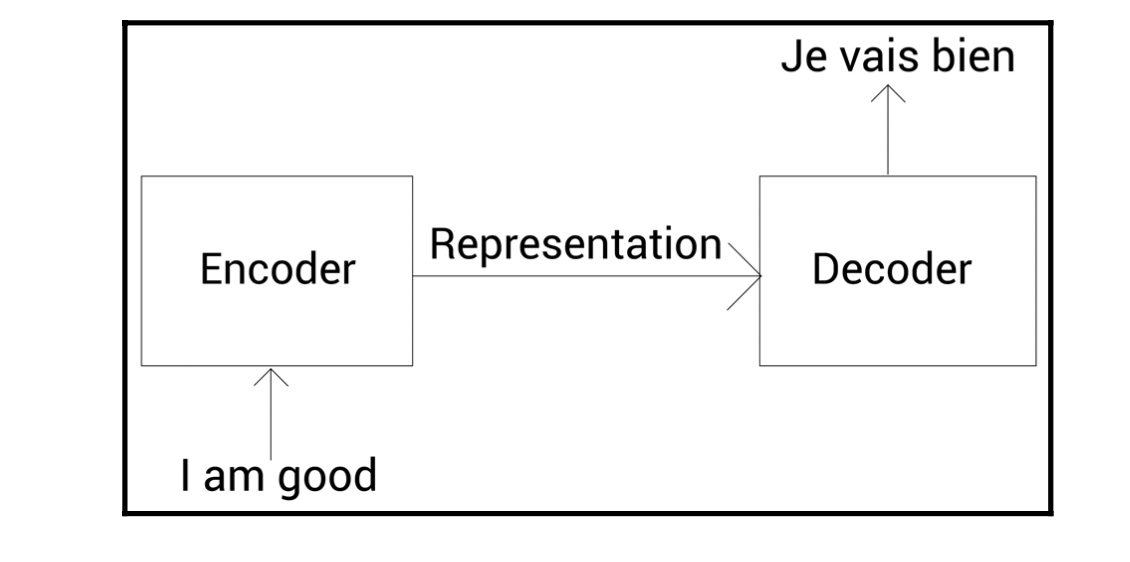 
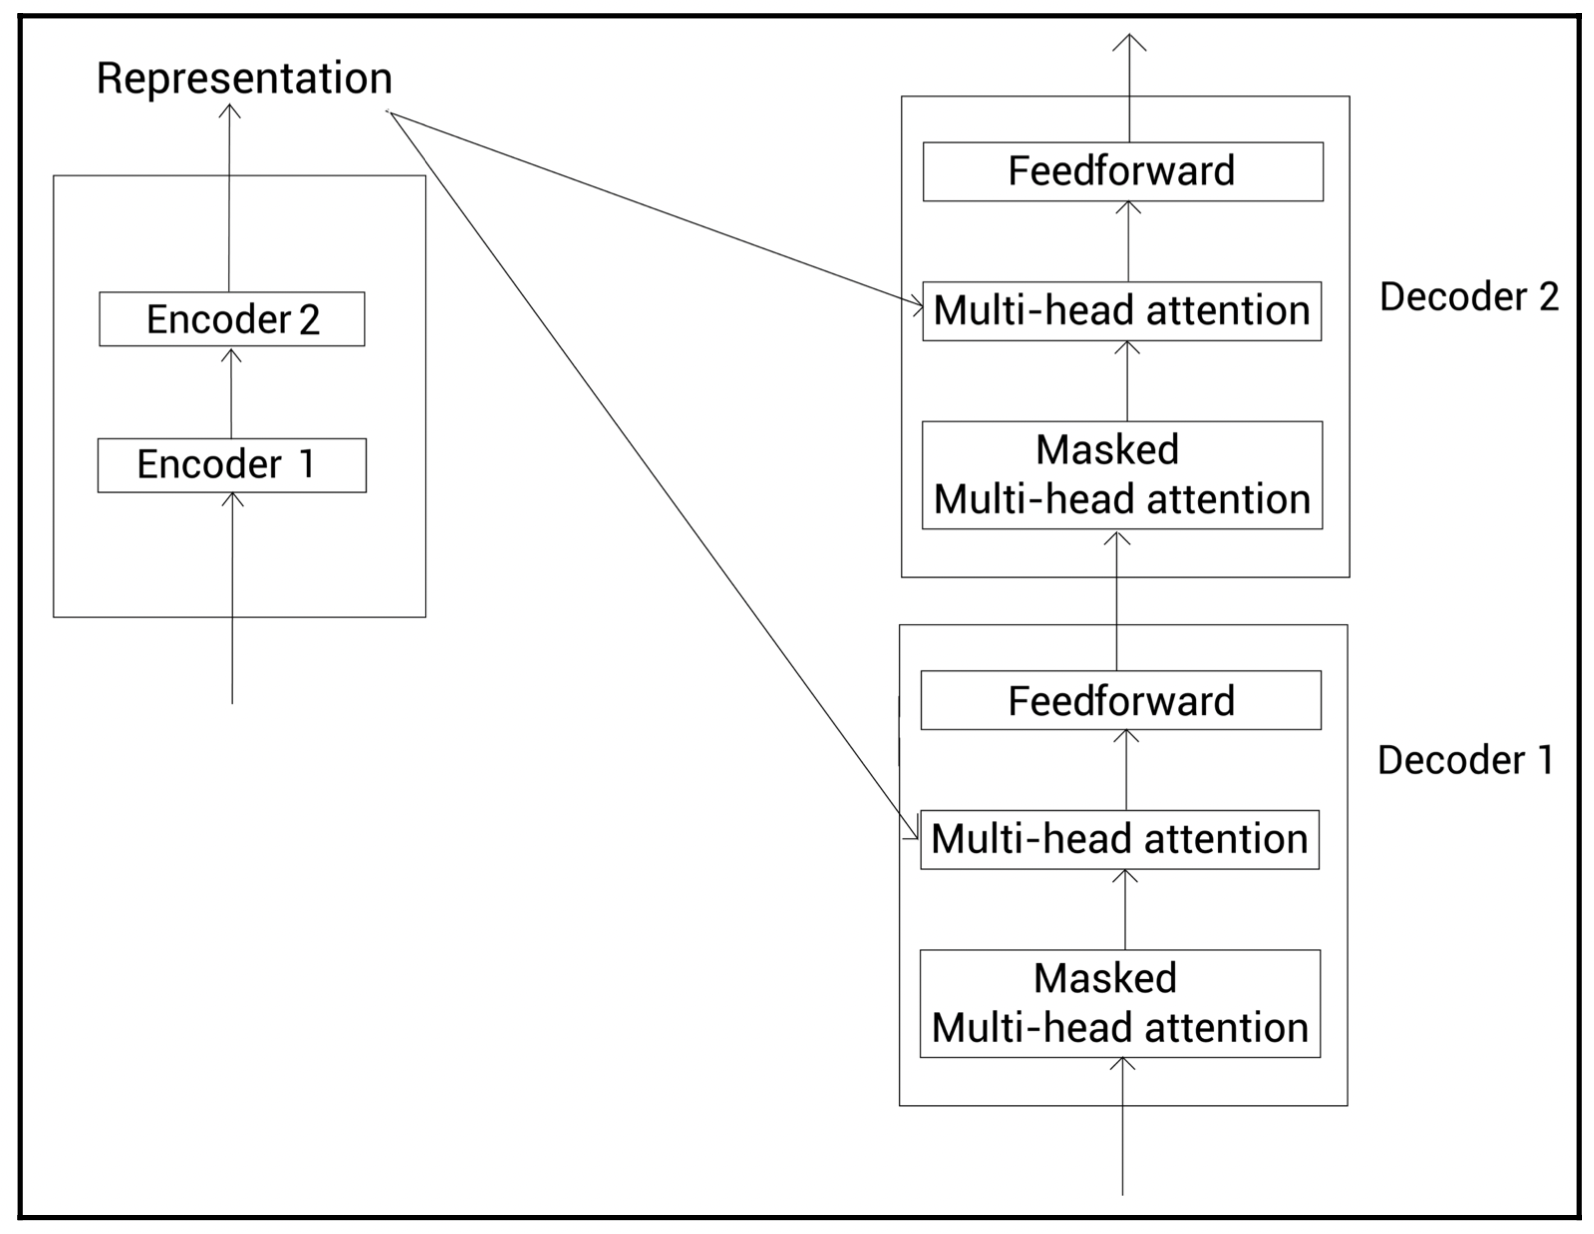 


## Basic working example   

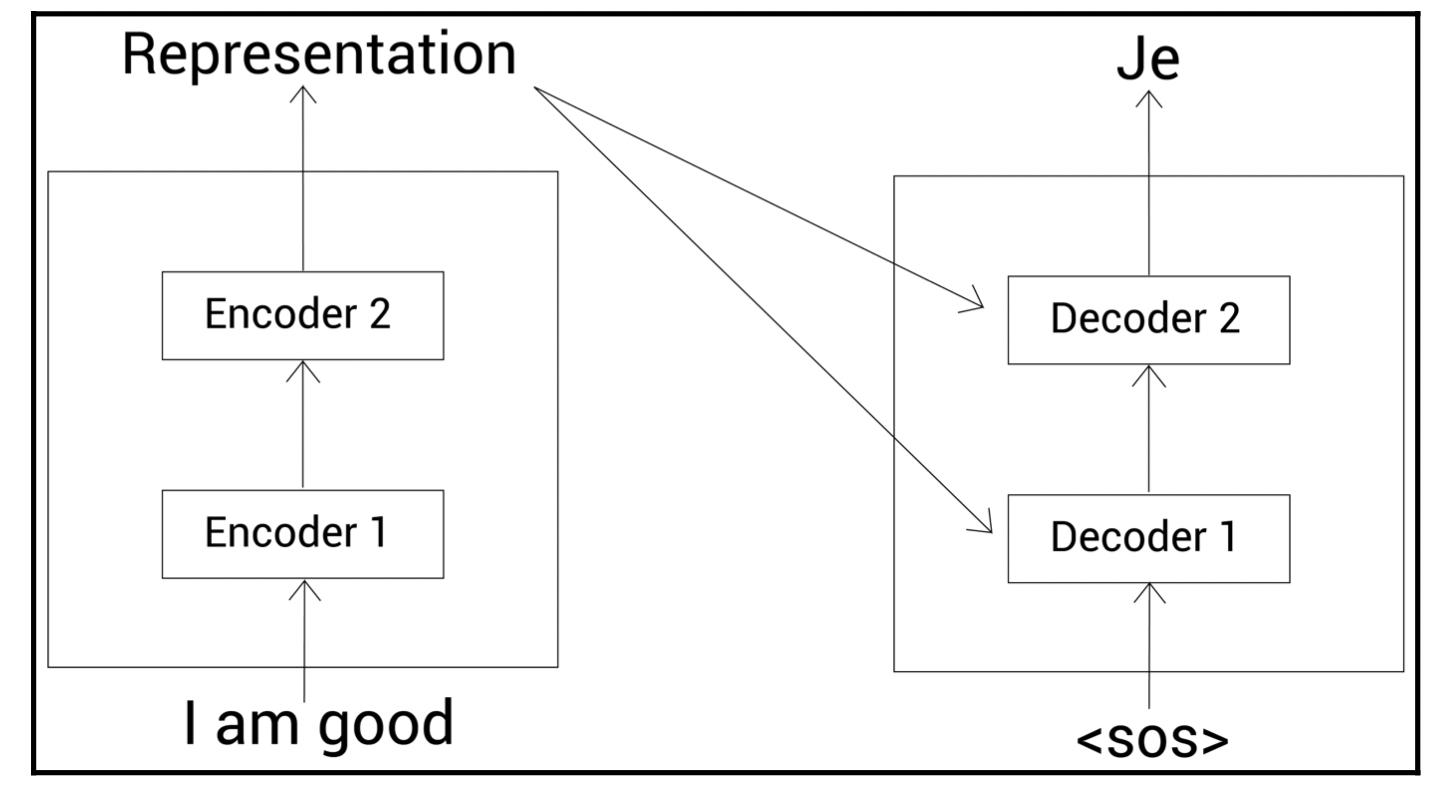 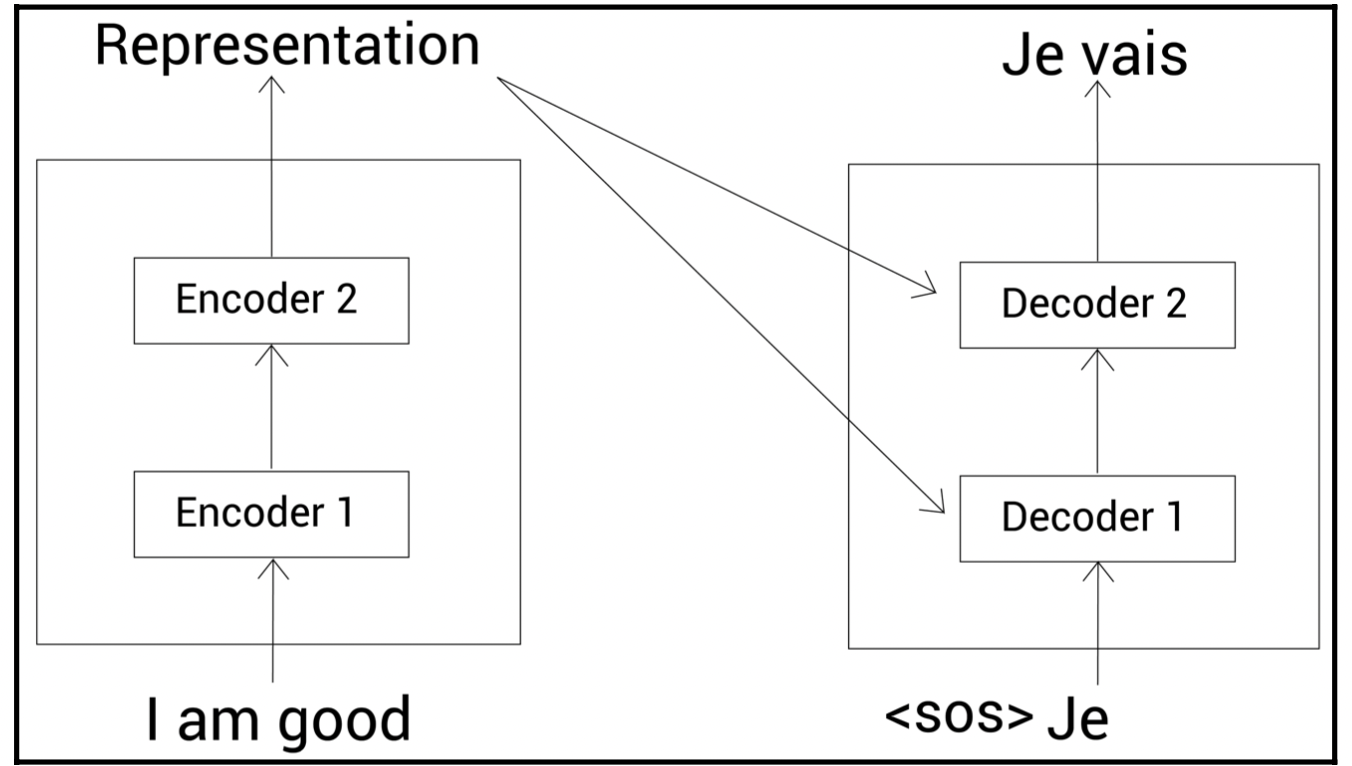 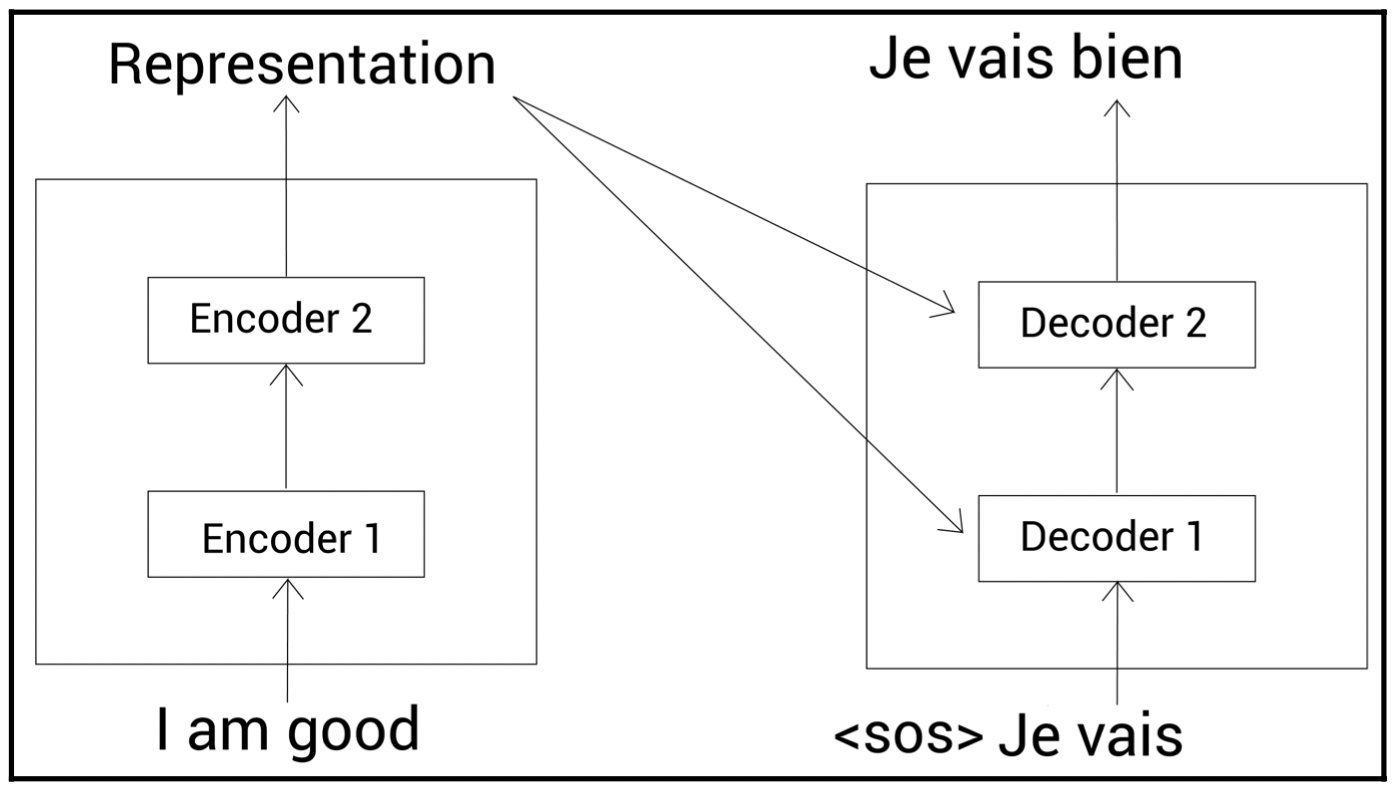 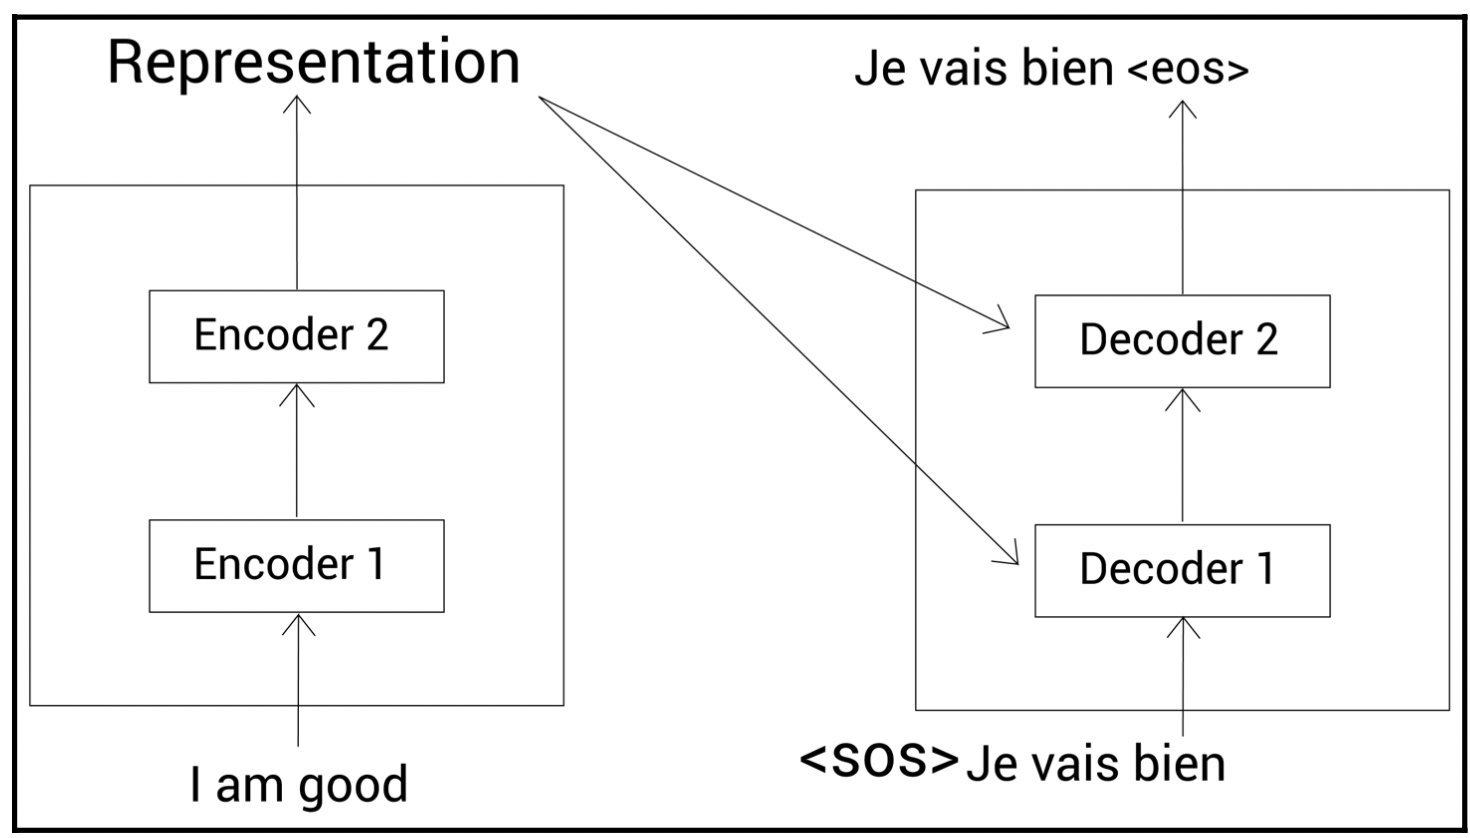 


## A Decoder Block

__Decoder Block has three sublayers:__

- Masked multi-head attention  
- Multi-head attention
- Feedforward network

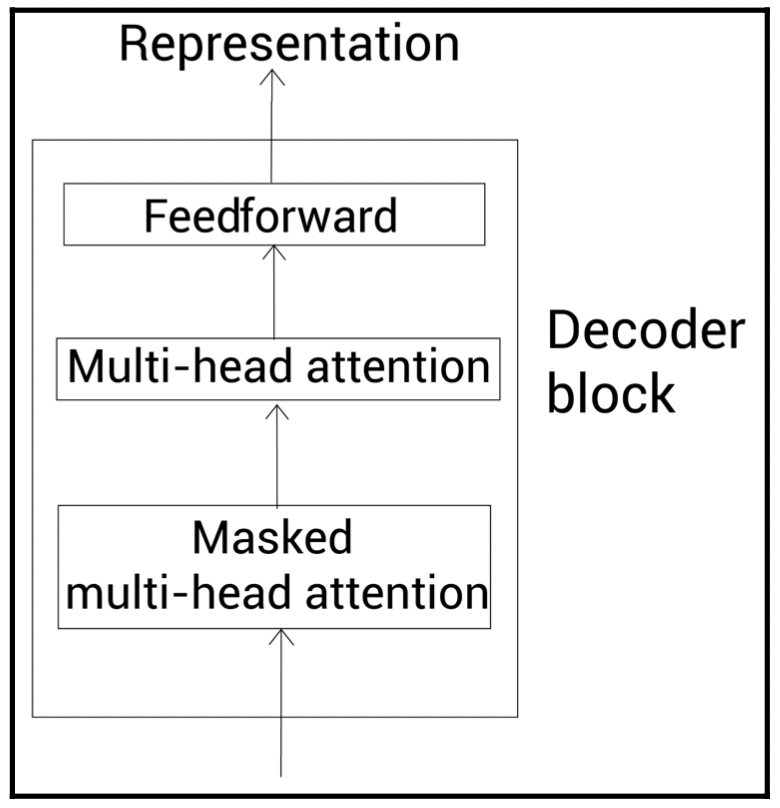


## Masked Multi head attention

__Training Data looks like this :__  

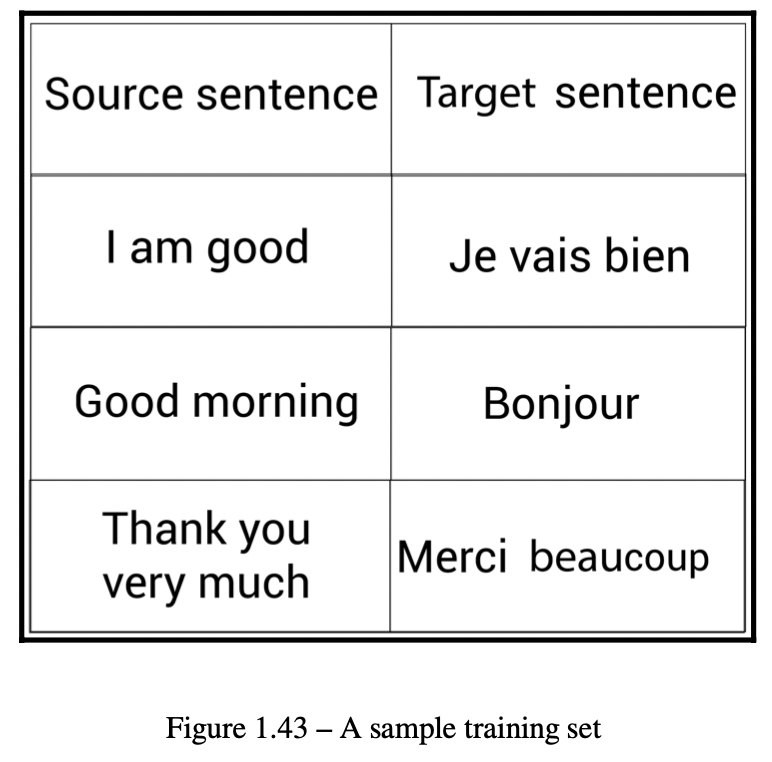


## Step 1
Feeding embeddings to multi masked headings

- Calculate the Q,K, V same as we were calulating in self attention mechanism 
- Multiple Q and K 
- Normalize with dimension 
- __Masking function__ 
- Softmax 
- Multiply with the V

__Masking looks like this:__  

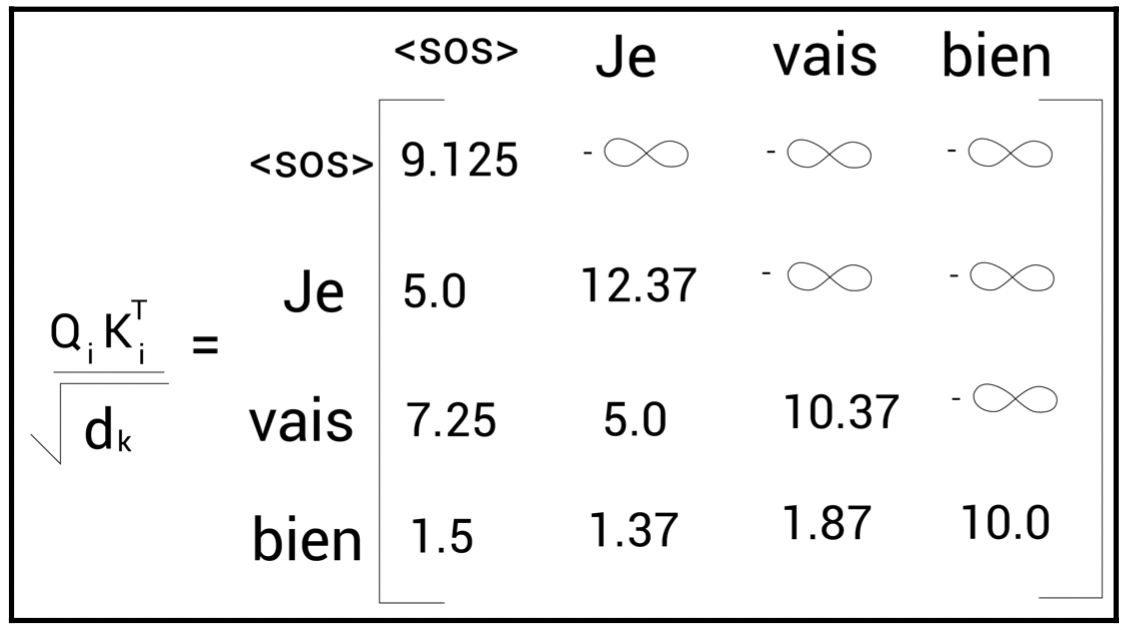


In [604]:
def self_attention(x,mask=False):
    '''
    Self attention mechanism to understand the basic working of self attention mechanism
    As per my understanding, Self attention mechanism is trying to find the similarity score 
    between words and then using softmax converting into probabilities.
    '''
    # creating random weigth matrix
#     W_q=np.random.randn(x.shape[1],64)
#     W_k=np.random.randn(x.shape[1],64)
#     W_v=np.random.randn(x.shape[1],64)
    W_q=np.random.randint(2,size=(x.shape[1],x.shape[0]))
    W_k=np.random.randint(2,size=(x.shape[1],x.shape[0]))
    W_v=np.random.randint(2,size=(x.shape[1],x.shape[0]))

    
    #Creating the Query, Key, and Value Matrix
    Q= np.dot(x,W_q) # trainable 
    K=np.dot(x,W_k) # trainable 
    V= np.dot(x,W_v) # trainable 
    
    # QK= np.dot(Q,K.transpose())
    #step 1
    #QK=Q@K.transpose()
    QK= np.dot(Q,K.transpose())
    
    #step 2 
    QK_d=np.divide(QK,np.sqrt(K.shape[1]))
    
    if mask:
        #for decoder
        QK_d[np.triu_indices(n=x.shape[0],m=x.shape[1],k=1)]= - math.inf #masking 
        print('After Masking: \n', QK_d)
        soft_QK_d=softmax(QK_d)
    else:
        #step 3
        soft_QK_d= softmax(QK_d)
    
    #step 4
    attention_matrix= V[:,None] * soft_QK_d.T[:,:,None]
    
    return attention_matrix.sum(axis=0)

In [605]:
# Code 
french_sent='<sos> je vais bien'
print('Target Sentence: \n', french_sent)
y =np.array( [[0,0,1,0],#<sos>
  [1, 0, 1, 0], # je
  [0, 2, 0, 2], # vais
  [1, 1, 1, 1]])  # bein
y=y.astype(float)
print('\nRespective Embeddings are:\n',y)


Target Sentence: 
 <sos> je vais bien

Respective Embeddings are:
 [[0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


In [606]:
# Masking multi-head attention 
after_masking_multihead=self_attention(y,mask=True)
print('After Masked Multi-head Attention: \n', after_masking_multihead)

After Masking: 
 [[ 0.5 -inf -inf -inf]
 [ 1.   1.  -inf -inf]
 [ 0.   0.   0.  -inf]
 [ 1.   1.   0.   1. ]]
After Masked Multi-head Attention: 
 [[1.         0.         1.         0.        ]
 [1.         0.5        1.5        0.5       ]
 [2.         1.         1.         0.33333333]
 [1.9215408  1.10923177 1.48461371 0.59384548]]


In [608]:
def maskedmultiheadattention(y):
    Z=[]
    for i in range(num_of_head):
        if i==0:
            Z= self_attention(y,mask=True)
        else:
            Z=np.hstack((Z,self_attention(y,mask=True)))
    #creating random weight matrix
    w_0= np.random.randn(Z.shape[1],y.shape[1]) # training =True
    Z= np.dot(Z,w_0)
    return Z
    

In [609]:
# Decoder working 
def Decoder(y,num_of_heads=8):
    '''
    Basic decoder function to understand the encoder architecture
    '''
    # positional encoding
    y_after_pe=positional_encoding(y)
    
    # masked multihead attention
    masked_multihead_attention= maskedmultiheadattention(y)
    
    # multihead attention 
    multi_head_attention= multiheadattention(masked_multihead_attention,num_of_head=num_of_heads)
    
    #layer norm
    layernorm= tf.keras.layers.LayerNormalization(axis=1)
    add_layer_norm= np.array(layernorm(multi_head_attention+y_after_pe))
    
    # feed forward network
    output= tf.keras.layers.Dense(y.shape[1], activation='relu')(add_layer_norm)
    
    #again ADD and Normalization 
    ouput= np.array(layernorm(output+add_layer_norm))
       
    return np.array(output)



In [611]:
Decoder(y)

NameError: name 'num_of_head' is not defined